## MLowe sprawy

In [2]:
from IPython.display import HTML
import random

display(HTML("<style>.container { width:80% !important; }</style>"))

def hide(for_next=False, t = 'Toggle show/hide'):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = t
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ''
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide(t='setup and import stuff')

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dropout
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statistics import mean

df = pd.read_csv('all.csv')
df.head(2)

,Unnamed: 0,liczba Ni,C/O/M-O-C/M-O-C-_,M-O-C-O/M-C-M,suma kombinacji,topologia,narożniki,krawędzie,ni_path_ncentre,ni_path_centre,...,srodek_masy,0%Ni,8%Ni,16%Ni,25%Ni,33%Ni,41%Ni,50%Ni,usieciowanie,centre_metal_Ni_=1
0,0,0,1,1,6,"['Cu', 'Cu', 'Cu', 'Cu', 'Cu', 'Cu', 'Cu', 'Cu...","[[1, 0, 5, 'Cu']]","[[1, 0, 5, 'Cu', 2, 0, 5, 'Cu']]",0,0,...,0.010645,12,0,0,0,0,0,0,0,0
1,1,1,1,1,6,"['Ni', 'Cu', 'Cu', 'Cu', 'Cu', 'Cu', 'Cu', 'Cu...","[[1, 0, 5, 'Cu']]","[[1, 0, 5, 'Cu', 2, 0, 5, 'Cu']]",0,1,...,0.024657,0,12,0,0,0,0,0,0,1


In [4]:
hide(for_next=True, t='lista zoptymalizowanych topologii uwzględniająca rotacje oraz dodawanie do tej listy cech z pliku all.csv')

In [5]:
list_of_sp_clusters = [
    
['58_MO_7_11c', '-65.233019', ' 94', '  0.95', '67.92m'],
['58_MOCOM_7_11e', '-70.411401', '118', '  2.00', '113.04m'],
['59_MO_1_6c', '-65.574785', '109', '  1.00', '79.86m'],
['59_MO_4_1c', '-65.529727', ' 88', '  0.99', '43.05m'],
['59_MO_7_6c', '-65.504183', ' 86', '  1.00', '56.84m'],
['59_MO_7_11c', '-65.505539', ' 84', '  1.00', '79.23m'],
['59_MOCOM_1_6e', '-70.699663', ' 67', '  2.00', '47.35m'],
['59_MOCOM_7_11e', '-70.690372', ' 64', '  2.00', '42.76m'],
['59_MOCOM_10_11e', '-70.445968', '107', '  2.00', '103.00m'],
['60_MO_7_6c', '-65.293487', ' 87', '  1.00', '42.41m'],
['60_MO_7_11c', '-65.293939', '117', '  1.00', '79.45m'],
['60_MOCOM_7_11e', '-70.596544', ' 76', '  2.00', '37.12m'],
['61_MO_4_1c', '-65.302266', ' 87', '  0.99', '57.71m'],
['61_MOCOM_1_6e', '-70.623761', ' 70', '  2.00', '65.02m'],
['61_MOCOM_10_11e', '-70.396020', ' 78', '  2.00', '56.22m'],
['62_MO_4_1c', '-65.377309', '148', '  1.00', '72.38m'],
['62_MO_7_6c', '-65.391451', '110', '  1.00', '105.22m'],
['62_MO_10_11c', '-65.569868', ' 93', '  1.00', '45.04m'],
['62_MOCOM_1_6e', '-70.634590', ' 68', '  2.00', '45.44m'],
['62_MOCOM_10_11e', '-70.616664', ' 74', '  2.00', '69.68m'],
['63_MO_4_1c', '-65.379137', ' 85', '  1.00', '61.36m'],
['63_MO_7_6c', '-65.377321', ' 76', '  1.00', '49.24m'],
['63_MO_7_11c', '-65.370766', ' 89', '  1.00', '85.27m'],
['63_MOCOM_1_6e', '-70.653083', ' 68', '  2.00', '48.53m'],
['63_MOCOM_7_11e', '-70.753183', ' 67', '  2.00', '32.19m'],
['63_MOCOM_10_11e', '-70.616416', ' 73', '  2.00', '49.58m'],
['64_MO_4_1c', '-65.382596', ' 75', '  1.00', '53.41m'],
['64_MO_7_6c', '-65.385859', ' 80', '  1.00', '51.89m'],
['64_MO_7_11c', '-65.387441', '116', '  1.00', '111.47m'],
['64_MOCOM_7_11e', '-70.445859', ' 74', '  2.00', '52.33m'],
['65_MOCOM_7_11e', '-70.725644', ' 67', '  2.00', '44.02m'],
['66_MOCOM_1_6e', '-70.656484', ' 67', '  2.00', '61.66m'],
['66_MOCOM_7_11e', '-70.732579', ' 59', '  2.00', '38.56m'],
['67_MO_7_6c', '-65.634295', '101', '  1.00', '97.02m'],
['67_MOCOM_7_11e', '-70.751643', ' 60', '  2.00', '28.36m'],
['69_MOCOM_1_6e', '-70.718694', ' 63', '  2.00', '44.71m'],
['69_MOCOM_10_11e', '-70.692798', ' 65', '  2.00', '60.23m'],
['70_MO_1_6c', '-65.585663', ' 82', '  1.00', '54.08m'],
['70_MO_4_1c', '-65.614302', ' 70', '  1.00', '33.52m'],
['70_MOCOM_10_11e', '-70.596936', '105', '  1.14', '77.08m'],
['73_MO_1_6c', '-64.435002', '101', '  1.00', '77.20m'],
['73_MOCOM_1_6e', '-69.578072', ' 81', '  2.00', '58.41m'],
['73_MOCOM_7_11e', '-69.598922', ' 72', '  1.99', '34.98m'],
['74_MO_7_11c', '-64.135812', '124', '  0.95', '91.86m'],
['74_MOCOM_1_6e', '-69.552065', ' 90', '  2.00', '62.37m'],
['74_MOCOM_7_11e', '-69.363349', ' 86', '  1.97', '41.93m'],
['75_MO_7_11c', '-64.081176', '132', '  0.95', '66.01m'],
['75_MOCOM_1_6e', '-69.500441', ' 97', '  1.99', '91.68m'],
['75_MOCOM_7_11e', '-69.323647', ' 80', '  1.98', '38.97m'],
['76_MO_1_6c', '-64.392730', '142', '  1.05', '139.04m'],
['76_MOCOM_1_6e', '-69.540920', ' 90', '  2.00', '43.94m'],
['77_MOCOM_1_6e', '-69.597935', ' 82', '  2.00', '39.63m'],
['77_MOCOM_7_11e', '-69.594262', ' 78', '  1.99', '72.91m'],
['77_MOCOM_10_11e', '-69.497759', ' 87', '  2.00', '42.49m'],
['78_MO_1_6c', '-64.452970', ' 90', '  1.00', '87.76m'],
['78_MO_7_11c', '-64.196287', ' 93', '  0.99', '45.16m'],
['79_MOCOM_7_11e', '-69.658111', ' 69', '  2.00', '49.78m'],
['80_MO_4_1c', '-64.518644', '117', '  1.02', '58.69m'],
['80_MO_7_11c', '-64.467623', '117', '  0.99', '111.79m'],
['80_MOCOM_1_6e', '-69.695239', ' 80', '  2.00', '57.60m'],
['80_MOCOM_7_11e', '-69.897395', ' 72', '  2.00', '50.79m'],
['80_MOCOM_10_11e', '-69.628464', '123', '  2.00', '60.37m'],
['81_MO_1_6c', '-64.516918', '137', '  1.00', '131.91m'],
['81_MOCOM_1_6e', '-69.647598', ' 74', '  2.00', '49.67m'],
['81_MOCOM_7_11e', '-69.640736', ' 87', '  2.00', '42.79m'],
['82_MO_1_6c', '-64.481866', '133', '  1.00', '99.58m'],
['83_MO_4_1c', '-64.221759', '149', '  1.00', '75.09m'],
['83_MO_10_11c', '-64.213882', ' 86', '  1.00', '57.29m'],
['83_MOCOM_10_11e', '-69.336487', ' 88', '  2.00', '63.66m'],
['84_MO_1_6c', '-64.469271', '146', '  1.00', '101.75m'],
['84_MO_7_6c', '-64.515202', ' 88', '  1.00', '82.83m'],
['84_MO_7_11c', '-64.517165', ' 91', '  1.00', '66.78m'],
['84_MOCOM_7_11e', '-69.691253', '130', '  2.00', '64.84m'],
['85_MO_4_1c', '-64.278401', '107', '  1.04', '78.42m'],
['85_MO_10_11c', '-64.276352', '106', '  0.91', '99.74m'],
['85_MOCOM_1_6e', '-69.620985', ' 75', '  2.00', '36.74m'],
['86_MO_7_6c', '-64.501945', '126', '  1.00', '93.28m'],
['86_MO_7_11c', '-64.504028', ' 83', '  1.00', '54.93m'],
['86_MOCOM_7_11e', '-69.656071', ' 76', '  2.00', '36.39m'],
['86_MOCOM_10_11e', '-69.304266', ' 88', '  2.00', '60.33m'],
['88_MO_1_6c', '-64.524022', '134', '  1.01', '130.88m'],
['88_MO_4_1c', '-64.318226', '130', '  0.99', '98.01m'],
['88_MO_7_6c', '-64.322829', '127', '  1.00', '86.01m'],
['88_MOCOM_1_6e', '-69.573994', ' 81', '  2.00', '77.37m'],
['89_MO_1_6c', '-64.529438', '145', '  1.01', '109.28m'],
['89_MOCOM_7_11e', '-69.696211', '104', '  2.00', '49.06m'],
['90_MO_4_1c', '-64.320840', '108', '  0.99', '74.40m'],
['91_MO_1_6c', '-64.500061', '143', '  1.00', '72.21m'],
['92_MO_1_6c', '-64.528439', ' 67', '  0.93', '45.09m'],
['92_MOCOM_1_6e', '-69.675883', ' 67', '  2.00', '32.23m'],
['93_MO_1_6c', '-64.569933', ' 86', '  0.97', '62.56m'],
['94_MO_1_6c', '-64.505952', ' 82', '  1.00', '78.59m'],
['58_MO_1_2c', '-65.523202', ' 81', '  1.00', '76.23m'],
['58_MO_1_3c', '-65.519867', '127', '  1.00', '123.24m'],
['58_MO_2_1c', '-65.491994', ' 98', '  1.00', '95.72m'],
['58_MO_2_3c', '-65.514167', '102', '  1.00', '96.52m'],
['58_MOCOM_1_2e', '-70.869074', ' 80', '  2.00', '75.13m'],
['58_MOCOM_1_3e', '-70.813864', ' 77', '  2.00', '72.64m'],
['58_MOCOM_2_3e', '-70.894033', '137', '  2.00', '125.61m'],
['59_MO_1_3c', '-65.574236', '120', '  1.00', '115.92m'],
['59_MO_2_1c', '-65.536804', ' 89', '  1.00', '84.38m'],
['59_MOCOM_1_2e', '-70.907739', '105', '  2.00', '103.77m'],
['59_MOCOM_1_3e', '-70.839739', '100', '  2.00', '49.51m'],
['60_MO_1_2c', '-65.575828', ' 76', '  1.00', '37.11m'],
['60_MO_1_3c', '-65.573333', ' 88', '  1.00', '82.54m'],
['60_MO_2_1c', '-65.569728', ' 82', '  1.00', '39.69m'],
['60_MO_2_3c', '-65.587648', ' 74', '  1.00', '35.24m'],
['60_MOCOM_1_2e', '-70.892523', ' 67', '  2.00', '61.97m'],
['60_MOCOM_1_3e', '-70.763718', ' 77', '  2.00', '37.50m'],
['61_MO_1_2c', '-65.557614', ' 89', '  1.00', '43.25m'],
['61_MO_1_3c', '-65.550932', '123', '  1.00', '118.59m'],
['61_MOCOM_1_2e', '-70.899852', ' 71', '  2.00', '33.70m'],
['61_MOCOM_1_3e', '-70.863911', ' 81', '  2.00', '39.10m'],
['62_MO_2_1c', '-65.584896', ' 89', '  1.00', '43.67m'],
['62_MO_2_3c', '-65.587483', ' 98', '  1.00', '47.58m'],
['62_MOCOM_1_2e', '-70.896043', ' 66', '  2.00', '61.06m'],
['62_MOCOM_2_3e', '-70.890320', ' 72', '  2.00', '34.29m'],
['63_MO_2_3c', '-65.630664', ' 78', '  1.00', '37.68m'],
['63_MOCOM_1_2e', '-70.947923', ' 62', '  2.00', '58.55m'],
['63_MOCOM_2_3e', '-70.895179', ' 71', '  2.00', '34.40m'],
['64_MO_2_1c', '-65.602796', ' 78', '  1.00', '37.90m'],
['64_MOCOM_1_2e', '-70.859593', ' 70', '  2.00', '65.80m'],
['64_MOCOM_2_3e', '-70.916721', ' 74', '  2.00', '35.52m'],
['65_MO_1_2c', '-65.675194', '148', '  1.00', '143.33m'],
['65_MO_1_3c', '-65.664414', '134', ' -1.00', '66.82m'],
['65_MOCOM_1_2e', '-70.920563', ' 65', '  2.00', '31.22m'],
['66_MO_1_2c', '-65.600816', '137', '  1.00', '68.28m'],
['66_MO_1_3c', '-65.605287', ' 84', '  1.00', '78.76m'],
['66_MOCOM_1_2e', '-70.962872', ' 54', '  2.00', '25.81m'],
['66_MOCOM_1_3e', '-70.636110', ' 70', '  2.00', '34.01m'],
['67_MOCOM_1_2e', '-70.983490', ' 55', '  2.00', '27.10m'],
['68_MOCOM_1_2e', '-70.953929', ' 67', '  2.00', '31.81m'],
['73_MO_2_1c', '-64.406165', '101', '  0.98', '49.51m'],
['89_MOCOM_1_6e', '-69.585601', ' 74', '  2.00', '69.74m'],
['86_MO_1_6c', '-64.502746', '105', '  1.00', '51.62m'],
['81_MO_4_1c', '-64.501694', '109', '  0.99', '70.80m'],
['77_MO_1_6c', '-64.436766', '130', '  1.00', '65.74m'],
['73_MOCOM_10_11e', '-69.299546', ' 87', '  1.99', '56.34m'],
['68_MO_1_6c', '-65.590320', ' 89', '  0.97', '42.35m'],
['58_MOCOM_1_6e', '-70.620591', ' 71', '  2.00', '66.05m'],
['32_MO_7_8c', '  -64.042346', ' 80', ' -0.07', '40.87m'],
['33_MO_4_1c', '  -64.125862', ' 42', ' -0.00', '21.63m'],
['33_MO_7_8c', '  -64.131703', ' 59', ' -0.00', '45.87m'],
['34_MO_4_1c', '  -64.199997', '138', '  0.00', '67.76m'],
['34_MO_7_8c', '  -64.207012', ' 55', '  0.05', '28.61m'],
['35_MO_4_1c', '  -64.344807', ' 37', ' -0.01', '29.18m'],
['36_MO_4_1c', '  -64.376822', ' 38', ' -0.01', '20.22m'],
['37_MO_7_8c', '  -64.142653', ' 41', ' -0.01', '21.97m'],
['38_MO_7_8c', '  -64.144700', ' 48', ' -0.13', '26.16m'],
['39_MO_7_8c', '  -64.166056', ' 42', ' -0.05', '33.49m'],
['40_MO_7_8c', '  -64.243998', ' 93', '  0.10', '47.60m'],
['41_MO_4_1c', '  -64.239147', ' 48', '  0.00', '25.08m'],
['43_MO_4_1c', '  -64.218066', ' 51', '  0.16', '39.43m'],
['45_MO_7_8c', '  -63.214251', ' 90', ' -0.05', '65.58m'],
['47_MO_4_1c', '  -62.996173', ' 80', ' -0.18', '40.69m'],
['48_MO_4_1c', '  -63.064178', '145', ' -0.04', '71.93m'],
['48_MO_7_8c', '  -63.070872', ' 47', ' -0.08', '37.56m'],
['49_MO_4_1c', '  -63.068930', ' 50', ' -0.08', '26.26m'],
['49_MO_7_8c', '  -63.062430', ' 76', ' -0.08', '40.15m'],
['50_MO_4_1c', '  -63.101709', ' 67', ' -0.07', '52.37m'],
['51_MO_4_1c', '  -63.147446', '101', '  0.05', '51.73m'],
['52_MO_7_8c', '  -63.267096', ' 56', '  0.55', '43.81m'],
['53_MO_7_8c', '  -63.307218', ' 47', '  1.07', '24.42m'],
['56_MO_4_1c', '  -63.304951', ' 92', ' -0.12', '47.96m'],
['32_MOCOM_1_3e', '  -69.627015', ' 72', '  1.00', '37.12m'],
['32_MOCOM_1_5e', '  -69.486200', ' 36', '  1.00', '19.56m'],
['32_MOCOM_5_11e', '  -69.270329', ' 44', '  1.00', '36.43m'],
['33_MOCOM_1_5e', '  -69.794363', ' 50', '  1.00', '25.81m'],
['34_MOCOM_1_5e', '  -69.572613', ' 31', '  1.00', '16.47m'],
['34_MOCOM_5_11e', '  -69.285676', ' 36', '  1.00', '19.45m'],
['35_MOCOM_1_3e', '  -69.482269', ' 39', '  1.00', '31.25m'],
['35_MOCOM_1_5e', '  -69.560405', ' 33', '  1.00', '17.87m'],
['36_MOCOM_1_3e', '  -69.479294', ' 38', '  1.00', '20.48m'],
['36_MOCOM_1_5e', '  -69.487313', ' 33', '  1.00', '17.45m'],
['36_MOCOM_5_11e', '  -69.379640', ' 65', '  1.00', '32.16m'],
['37_MOCOM_1_3e', '  -69.472898', ' 41', '  1.00', '22.20m'],
['38_MOCOM_1_3e', '  -69.417902', ' 37', '  1.00', '19.40m'],
['38_MOCOM_1_5e', '  -69.495357', ' 43', '  1.00', '33.76m'],
['38_MOCOM_5_11e', '  -69.542323', ' 38', '  1.02', '20.71m'],
['39_MOCOM_1_3e', '  -69.406798', ' 74', '  1.00', '38.20m'],
['39_MOCOM_1_5e', '  -69.461751', ' 36', '  1.00', '19.21m'],
['39_MOCOM_5_11e', '  -69.432880', ' 48', '  1.00', '24.73m'],
['40_MOCOM_1_3e', '  -69.522027', ' 35', '  1.00', '27.94m'],
['40_MOCOM_1_5e', '  -69.559749', ' 31', '  1.00', '16.18m'],
['40_MOCOM_5_11e', '  -69.339101', ' 34', '  1.00', '17.35m'],
['41_MOCOM_1_3e', '  -69.469695', ' 35', '  1.00', '18.67m'],
['42_MOCOM_1_3e', '  -69.444270', ' 51', '  1.00', '26.56m'],
['42_MOCOM_1_5e', '  -69.511232', ' 38', '  1.00', '29.88m'],
['42_MOCOM_5_11e', '  -69.392534', ' 31', '  1.00', '15.88m'],
['43_MOCOM_1_3e', '  -69.546009', ' 36', '  1.00', '18.71m'],
['44_MOCOM_1_3e', '  -68.529358', ' 63', '  1.00', '33.67m'],
['45_MOCOM_1_3e', '  -68.551024', ' 93', '  0.99', '47.49m'],
['45_MOCOM_1_5e', '  -68.446490', ' 39', '  1.00', '31.70m'],
['46_MOCOM_1_3e', '  -68.591172', ' 48', '  1.00', '25.79m'],
['46_MOCOM_1_5e', '  -68.469537', ' 49', '  1.00', '26.26m'],
['46_MOCOM_5_11e', '  -68.414678', '103', '  1.00', '52.43m'],
['47_MOCOM_1_3e', '  -68.607970', ' 71', '  1.00', '57.10m'],
['47_MOCOM_1_5e', '  -68.735456', ' 38', '  1.00', '19.88m'],
['47_MOCOM_5_11e', '  -68.406305', ' 45', '  0.99', '24.10m'],
['48_MOCOM_1_5e', '  -68.836729', ' 52', '  1.00', '26.57m'],
['48_MOCOM_5_11e', '  -68.441023', ' 38', '  0.97', '20.99m'],
['49_MOCOM_1_5e', '  -68.822194', ' 47', '  1.04', '24.93m'],
['50_MOCOM_1_5e', '  -68.761195', ' 46', '  1.00', '35.69m'],
['52_MOCOM_1_3e', '  -68.401317', ' 41', '  1.00', '22.14m'],
['52_MOCOM_1_5e', '  -68.455080', ' 34', '  1.00', '18.44m'],
['52_MOCOM_5_11e', '  -68.343361', ' 40', '  1.00', '21.61m'],
['53_MOCOM_1_3e', '  -68.420270', ' 39', '  1.00', '21.44m'],
['53_MOCOM_5_11e', '  -68.335841', ' 78', '  1.00', '61.27m'],
['54_MOCOM_1_3e', '  -68.411448', ' 44', '  0.93', '22.86m'],
['54_MOCOM_1_5e', '  -68.417155', ' 36', '  1.00', '18.60m'],
['54_MOCOM_5_11e', '  -68.254856', ' 38', '  1.05', '20.05m'],
['55_MOCOM_1_3e', '  -68.402651', ' 38', '  1.00', '20.22m'],
['55_MOCOM_1_5e', '  -68.469626', ' 43', '  0.92', '23.12m'],
['56_MOCOM_1_3e', '  -68.369809', ' 52', '  1.00', '27.21m'],
['56_MOCOM_1_5e', '  -68.457441', ' 34', '  1.00', '27.36m'],
['56_MOCOM_5_11e', '  -68.516649', ' 44', '  1.06', '22.74m']

]

list_of_sp_clusters_that_is_calculate_but_not_included_in_further_procedure = [
[['26_MO_3_4c', '  -61.840374', ' 43', '  1.02', '26.72m'],
['27_MOCOM_3_8e', '  -67.145020', ' 48', '  0.00', '30.32m'],
['28_MOCOM_1_3e', '  -67.311398', ' 65', '  0.07', '52.72m'],
['29_MO_1_6c', '  -62.059094', ' 49', '  1.03', '31.34m'],
['20_MOCOM_2_6e', '  -67.146268', ' 42', ' -0.07', '26.09m'],
['18_MO_10_4c', '  -63.147471', ' 53', '  1.00', '33.91m'],
['18_MO_1_2c', '  -63.202858', ' 34', '  1.00', '21.51m'],
['20_MOCOM_5_11e', '  -66.967862', ' 77', '  0.07', '49.12m'],
['23_MOCOM_3_9e', '  -67.057860', ' 83', ' -0.06', '49.51m'],
['16_MOCOM_5_6e', '  -68.107999', ' 35', ' -0.05', '29.18m'],
['17_MO_6_7c', '  -62.931067', ' 52', '  1.00', '34.35m'],
['28_MO_5_6c', '  -61.867488', '127', '  1.02', '80.39m'],
['26_MOCOM_3_8e', '  -67.035472', '122', '  0.04', '74.16m'],
['27_MO_12_8c', '  -62.050972', ' 48', '  1.01', '31.09m'],
['17_MOCOM_3_9e', '  -68.410292', ' 52', '  0.02', '41.46m'],
['27_MO_1_2c', '  -62.079909', ' 40', '  1.01', '33.93m'],
['28_MO_1_3c', '  -62.088027', ' 54', '  1.01', '34.93m'],
['18_MO_1_4c', '  -63.198975', ' 33', '  1.00', '27.63m'],
['17_MO_6_1c', '  -62.913507', '148', '  1.01', '94.98m'],
['31_MO_4_10c', '  -61.920230', '127', '  1.01', '81.77m'],
['24_MO_1_6c', '  -61.992905', ' 44', '  1.02', '37.03m'],
['28_MO_6_5c', '  -61.872490', ' 91', '  1.01', '55.90m'],
['30_MO_5_6c', '  -61.875654', '106', '  1.03', '66.40m'],
['25_MOCOM_1_3e', '  -67.204984', ' 37', ' -0.09', '24.68m'],
['21_MO_4_9c', '  -61.770977', ' 51', '  1.01', '33.38m'],
['29_MO_3_1c', '  -61.864931', '107', '  1.02', '68.35m'],
['16_MO_11_5c', '  -62.898653', ' 92', '  1.00', '60.61m'],
['19_MO_1_5c', '  -63.190214', ' 34', '  1.00', '28.14m'],
['18_MO_4_10c', '  -62.985382', ' 42', '  1.00', '35.58m'],
['18_MO_4_1c', '  -62.989393', ' 53', '  1.00', '34.58m'],
['21_MOCOM_2_8e', '  -67.141732', ' 91', ' -0.06', '57.06m'],
['23_MO_3_8c', '  -61.839310', ' 48', '  1.73', '30.79m'],
['26_MOCOM_11_12e', '  -67.305778', ' 56', ' -0.10', '36.46m'],
['30_MO_1_2c', '  -62.053674', ' 75', '  1.03', '46.67m'],
['23_MO_5_10c', '  -61.841480', ' 53', '  0.98', '33.72m'],
['19_MO_5_11c', '  -62.978342', ' 32', '  1.00', '20.47m'],
['25_MOCOM_3_8e', '  -67.080398', ' 43', ' -0.06', '28.45m'],
['25_MO_7_2c', '  -61.811705', ' 67', '  1.67', '43.45m'],
['21_MO_4_1c', '  -61.780458', ' 42', '  1.02', '27.31m'],
['31_MOCOM_3_9e', '  -67.285259', ' 34', ' -0.05', '22.32m'],
['19_MOCOM_4_5e', '  -68.139289', ' 43', '  0.05', '26.96m'],
['21_MO_1_2c', '  -61.974432', ' 78', '  1.00', '48.08m'],
['27_MO_3_8c', '  -61.885803', ' 57', '  1.00', '37.13m'],
['31_MO_4_1c', '  -61.924913', ' 76', '  1.01', '48.86m'],
['16_MOCOM_2_7e', '  -68.298573', ' 35', ' -0.01', '23.20m'],
['17_MO_3_2c', '  -62.937430', ' 77', '  1.00', '47.18m'],
['24_MOCOM_4_9e', '  -67.299276', ' 43', ' -0.06', '35.93m'],
['27_MO_1_4c', '  -62.072994', ' 54', '  1.01', '34.51m'],
['22_MO_10_9c', '  -62.013529', ' 53', '  1.04', '44.41m'],
['29_MOCOM_3_4e', '  -66.980533', ' 42', ' -0.00', '35.58m'],
['23_MO_9_8c', '  -61.844070', '113', '  0.97', '69.28m'],
['21_MO_8_2c', '  -61.726167', '108', '  1.02', '88.07m'],
['28_MO_6_2c', '  -61.881822', ' 68', '  1.01', '44.62m'],
['28_MO_1_6c', '  -62.103682', ' 57', '  1.01', '36.17m'],
['18_MO_3_4c', '  -62.998909', ' 38', '  1.00', '24.09m'],
['28_MOCOM_7_11e', '  -67.148638', ' 52', '  0.03', '33.62m'],
['22_MO_10_4c', '  -62.017355', ' 49', '  1.04', '32.43m'],
['26_MO_7_12c', '  -61.806132', ' 61', '  1.01', '39.20m'],
['24_MOCOM_1_2e', '  -67.503411', ' 33', '  1.84', '27.68m'],
['27_MO_2_1c', '  -62.080543', '113', '  1.02', '72.08m'],
['22_MO_6_5c', '  -61.833961', ' 54', '  1.01', '46.40m'],
['21_MO_1_5c', '  -61.943347', '127', '  1.01', '107.25m'],
['19_MO_2_6c', '  -62.974586', ' 36', '  1.00', '22.93m'],
['27_MOCOM_1_2e', '  -67.500429', ' 32', '  1.24', '21.49m'],
['23_MO_1_2c', '  -62.033403', '103', '  1.02', '66.05m'],
['25_MO_1_6c', '  -62.031419', ' 44', '  1.01', '28.56m'],
['24_MO_3_4c', '  -61.779305', ' 53', '  1.04', '33.95m']]

]
#teraz napisze funkcję, która z pierwotnego data setu będzie zwracac listę przydatnych parametrów

def usefull_info_from_df(nr_klastra):
    lista = []
    lista.append(topology_to_list(df['topologia'][nr_klastra]))    
    lista.append(df['ni_path_centre'][nr_klastra])
    lista.append(df['ni_path_ncentre'][nr_klastra])
    lista.append(df['cu_with_centre'][nr_klastra])
    lista.append(df['cu_path_ncentre'][nr_klastra])
    lista.append(df['usieciowanie'][nr_klastra])
    lista.append(df['liczba Ni'][nr_klastra]/13)
    return lista

def topology_to_list(string):
    
    string_from_topology = []
    for i in range(2,80,6):
        string_from_topology.append(string[i:i+2])  
        
    return string_from_topology

#ok teraz, na podstawie topologii i np 7_11 będe oceniać do jakiego typu atomów
#przyłącza się CO2

def type_of_atom_to_which_co2_connect(list_with_cluster_properties):
    topologia = list_with_cluster_properties[5]
    polaczenie = list_with_cluster_properties[4]
        
    first = topologia[(int(polaczenie[0]))]
    second = topologia[(int(polaczenie[1]))]
    zmienna_1 = 2
    zmienna_2 = 2
    
    if first == 'Cu':
        zmienna_1 = 0
    else:
        zmienna_1 = 1
    
    if second == 'Cu':
        zmienna_2 = 0
    else:
        zmienna_2 = 1
        
    return zmienna_1, zmienna_2

#rozdzielanie na MO - 73 i MOCOM - 67
list_of_MO = []
list_of_MOCOM = []

for i in range(len(list_of_sp_clusters)):
    if list_of_sp_clusters[i][0][5] == 'C':
        list_of_MOCOM.append(list_of_sp_clusters[i][0:2])

    else:
        list_of_MO.append(list_of_sp_clusters[i][0:2])

#chce teraz rozdzielić nazwę klastra na kilka przydatnych informacji

#MO

for i in range(len(list_of_MO)):
    list_of_MO[i].append(int(list_of_MO[i][0][0:2]))
    list_of_MO[i].append(list_of_MO[i][0][3:5])
    list_of_MO[i].append(list_of_MO[i][0][6:-1])
    
    #teraz rozbijam np 7_11 na dwie cyfry 7 i 11
    list_of_MO[i][-1] = list_of_MO[i][-1].split('_')
    list_of_MO[i] += usefull_info_from_df(list_of_MO[i][2])
    list_of_MO[i].append(type_of_atom_to_which_co2_connect(list_of_MO[i])[0])
    list_of_MO[i].append(type_of_atom_to_which_co2_connect(list_of_MO[i])[1])


    
#robie teraz to samo z MOCOM

for i in range(len(list_of_MOCOM)):
    list_of_MOCOM[i].append(int(list_of_MOCOM[i][0][0:2]))
    list_of_MOCOM[i].append(list_of_MOCOM[i][0][3:8])
    list_of_MOCOM[i].append(list_of_MOCOM[i][0][9:-1])
    
    #teraz rozbijam np 7_11 na dwie cyfry 7 i 11
    list_of_MOCOM[i][-1] = list_of_MOCOM[i][-1].split('_')
    list_of_MOCOM[i] += usefull_info_from_df(list_of_MOCOM[i][2])
    list_of_MOCOM[i].append(type_of_atom_to_which_co2_connect(list_of_MOCOM[i])[0])
    list_of_MOCOM[i].append(type_of_atom_to_which_co2_connect(list_of_MOCOM[i])[1])




#ok, tworzymy dataframy

mo = pd.DataFrame(data = list_of_MO, columns = ['full_name','energy','number','type_of_connection','nvm','topology','ni_centre','ni_ncentre','cu_centre','cu_ncentre','usieciowanie','Ni','first','second'])
mocom = pd.DataFrame(data = list_of_MOCOM, columns = ['full_name','energy','number','type_of_connection','nvm','topology','ni_centre','ni_ncentre','cu_centre','cu_ncentre','usieciowanie','Ni','first','second'])
mocom = mocom.drop(['number','nvm','topology'], axis =1)
mo = mo.drop(['number','nvm','topology','second'], axis =1)

for i in range(len(mo)):
    mo['energy'][i] = float(mo['energy'][i])
for i in range(len(mocom)):
    mocom['energy'][i] = float(mocom['energy'][i])


<ipython-input-5-8d3896514816>:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mo['energy'][i] = float(mo['energy'][i])
<ipython-input-5-8d3896514816>:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mocom['energy'][i] = float(mocom['energy'][i])


In [6]:
len(list_of_sp_clusters)

216

### Scikit learn

In [10]:
#przygotowanie X i y datasetu - rozdzielamy na Ni = 5 i na Ni = 6
# from sklearn.preprocessing import MinMaxScaler
# mocom = mocom.drop(['full_name','energy','type_of_connection'],axis = 1)
# mocom
# scaler = MinMaxScaler()
# scaler.fit(mocom)
# mocom = scaler.transform(mocom)
# mocom = pd.DataFrame(data=mocom, columns = ['ni_centre','ni_ncentre','cu_centre','cu_ncentre','usieciowanie','Ni','f','s'])

mo_6 = mo[mo['Ni']==6/13]
mo_5 = mo[mo['Ni']==5/13]
#from sklearn.model_selection import train_test_split
#X = mocom.drop(['full_name','energy','type_of_connection'],axis = 1)

# y = mocom['energy']

# y = np.asarray(y).astype('float32')
# for i in range(len(y)):
#     y[i] += 70
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
mo_6


,full_name,energy,type_of_connection,ni_centre,ni_ncentre,cu_centre,cu_ncentre,usieciowanie,Ni,first
0,58_MO_7_11c,-65.233019,MO,6,5,7,7,24,0.461538,0
1,59_MO_1_6c,-65.574785,MO,6,5,7,7,22,0.461538,1
2,59_MO_4_1c,-65.529727,MO,6,5,7,7,22,0.461538,1
3,59_MO_7_6c,-65.504183,MO,6,5,7,7,22,0.461538,1
4,59_MO_7_11c,-65.505539,MO,6,5,7,7,22,0.461538,1
...,...,...,...,...,...,...,...,...,...,...
68,73_MO_2_1c,-64.406165,MO,6,6,7,6,16,0.461538,1
69,86_MO_1_6c,-64.502746,MO,6,6,7,6,12,0.461538,1
70,81_MO_4_1c,-64.501694,MO,6,6,7,6,14,0.461538,1
71,77_MO_1_6c,-64.436766,MO,6,6,7,6,16,0.461538,1


In [13]:
X = mo_6.drop(['full_name','energy','type_of_connection','Ni'],axis = 1)


y = mo_6['energy']

y = np.asarray(y).astype('float32')
for i in range(len(y)):
    y[i] += 0
    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(data=X, columns = ['ni_centre','ni_ncentre','cu_centre','cu_ncentre','usieciowanie','first'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(n_estimators=300)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)


error=(rfc_pred-y_test)
srednia_error = 0
srednia_rfc = 0
srednia_y = 0

for i in range(len(error)):
    srednia_error+= np.sqrt(error[i]**2)
    srednia_rfc += np.sqrt(rfc_pred**2)
    srednia_y += np.sqrt(y_test[i]**2)
    
srednia_error /= len(error)
srednia_rfc /= len(error)


print(f'średni blad [eV] = {srednia_error}; odchylenie standardowe [eV] = {y_test.std()}; err/std [%] = {srednia_error/y_test.std()*100}')

X.head(3)

średni blad [eV] = 0.036098897600616436; odchylenie standardowe [eV] = 0.5308577418327332; err/std [%] = 6.800107591157777


,ni_centre,ni_ncentre,cu_centre,cu_ncentre,usieciowanie,first
0,0.0,0.0,0.0,0.5,1.000000,0.0
1,0.0,0.0,0.0,0.5,0.857143,1.0
2,0.0,0.0,0.0,0.5,0.857143,1.0


In [14]:
mo_test_5 = mo_5.drop(['full_name','energy','type_of_connection','Ni'],axis=1)
mo_5_energy = [mo_5['energy']]
rfc_pred = rfc.predict(mo_test_5)

error=(rfc_pred-mo_5_energy)
srednia_error = 0
srednia_rfc = 0
srednia_y = 0

for i in range(len(error)):
    srednia_error+= np.sqrt(error[0][i]**2)
    srednia_rfc += np.sqrt(rfc_pred**2)
    srednia_y += np.sqrt(y_test[i]**2)
    
srednia_error /= len(error[0])
srednia_rfc /= len(error[0])

mocom_5_std = 0.513
mo_5_std = 0.545
print(f'średni blad [eV] = {srednia_error}; odchylenie standardowe [eV] = {mo_5_std} ; err/std [%] = {srednia_error/mo_5_std*100}')
mo_5['energy']

średni blad [eV] = 0.0494887187069164; odchylenie standardowe [eV] = 0.545 ; err/std [%] = 9.08049884530576


73   -64.042346
74   -64.125862
75   -64.131703
76   -64.199997
77   -64.207012
78   -64.344807
79   -64.376822
80   -64.142653
81     -64.1447
82   -64.166056
83   -64.243998
84   -64.239147
85   -64.218066
86   -63.214251
87   -62.996173
88   -63.064178
89   -63.070872
90    -63.06893
91    -63.06243
92   -63.101709
93   -63.147446
94   -63.267096
95   -63.307218
96   -63.304951
Name: energy, dtype: object

In [4]:
hide(for_next = True, t='śmietnik sieci neurnowych')

In [5]:
def create_dense_model(n_layers, initializer, activation):
    model = tf.keras.Sequential()
    neurons = min(32,2**n_layers)
    for i in range(n_layers):
        neurons_in_layer = neurons - 2**(n_layers-i)
        model.add(tf.keras.layers.Dense(neurons_in_layer, input_shape =(6,), kernel_initializer = initializer, activation = activation))
        model.add(Dropout(0.3))
    model.add(tf.keras.layers.Dense(1, activation=activation))
    model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.SGD(), metrics=[tf.metrics.MeanAbsoluteError()])

    return model

n_layers = [i for i in range(1,4)]
epochs = [i for i in range(60,101, 20)]
activations = ['relu', 'sigmoid', 'tanh']
initializers = ['uniform', 'he_uniform', 'orthogonal']
best_n_layers = None
best_epoch = None
best_activation = None
best_initializer = None
best_retval = 0

for e in epochs:
    for l in n_layers:
        for a in activations:
            for init in initializers:
                m = create_dense_model(l, init, a)
                m.fit(X_train, y_train, epochs=e, verbose=0)
                retval = m.evaluate(X_test, y_test)
                if retval[1] > best_retval:
                    best_retval = retval[1]
                    best_n_layers = l
                    best_epoch = e
                    best_activation = a
                    best_initializer = init
                print(f"retval: {retval}, layers: {l}, epoch: {e}, activation: {a}, initializer: {init}")

print(f"best retval: {best_retval}, best_n_layers: {best_n_layers}, best_epoch: {best_epoch}, best_activation: {best_activation}, best_initializer: {best_initializer}")

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape =(7,), kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(16, input_shape =(7,), kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.3))
model.add(tf.keras.layers.Dense(8, input_shape =(7,), kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.1))
model.add(tf.keras.layers.Dense(4, input_shape =(7,), kernel_initializer = 'uniform', activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation='relu'))
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
model.fit(X_train, y_train, epochs=100, verbose=1)

2022-06-21 09:57:32.499759: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-21 09:57:32.499889: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [42]:
for char in y_test:
    print(char)

for char in rfc_pred:
    print(char)

-69.36335
-69.30427
-69.69621
-70.892525
-70.8596
-69.59892
-70.98349
-69.89739
-70.61666
-70.813866
-70.63459
-69.6476
-70.75164
-69.32365
-69.47174961616878
-69.53877353338211
-69.62528244436355
-70.80890779301751
-70.89466608111063
-69.57604626380073
-70.93955271350426
-69.66564692824227
-70.64578193668589
-70.88045439777679
-70.64578193668589
-69.66387305323283
-70.68744665340097
-69.47174961616878


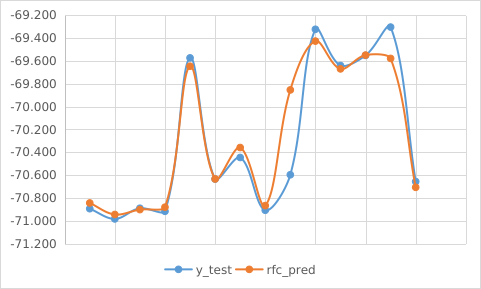


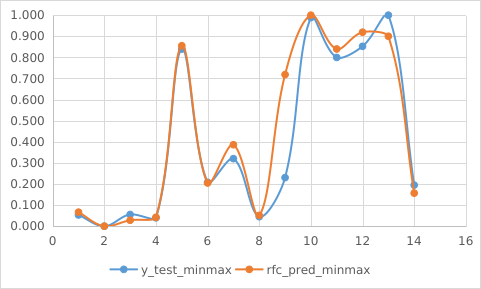

In [17]:
#Czy ja chcę przeliczać te Ni6 jeszcze raz z amix/bmix? Nie ma znaczenia

#HCOOH i CO??? narazie leave it